# Ridge Regression

## For 2-D Data

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression,load_diabetes

In [28]:
x,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

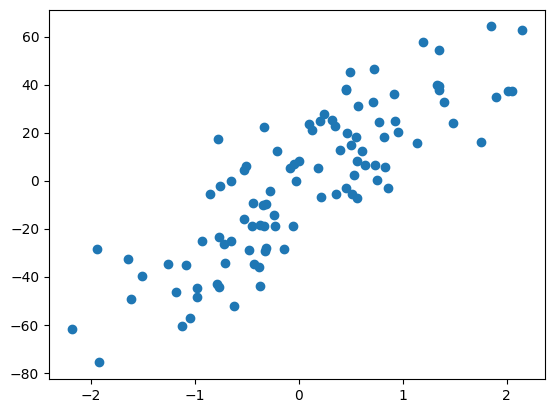

In [29]:
plt.scatter(x,y)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr=LinearRegression()
lr.fit(x,y)
lr.coef_,lr.intercept_

(array([27.82809103]), np.float64(-2.29474455867698))

In [32]:
from sklearn.linear_model import Ridge

rr=Ridge(alpha=10)
rr.fit(x,y)
rr.coef_,rr.intercept_

(array([24.9546267]), np.float64(-2.1269130035235735))

In [33]:
rr1=Ridge(alpha=100)
rr1.fit(x,y)
rr1.coef_,rr1.intercept_

(array([12.93442104]), np.float64(-1.4248441496033308))

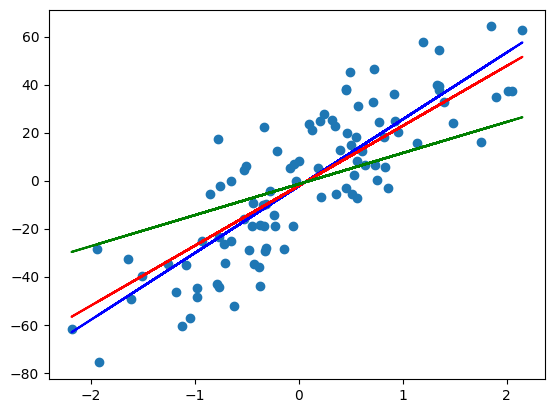

In [34]:
plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='blue')
plt.plot(x,rr.predict(x),color='red')
plt.plot(x,rr1.predict(x),color='green')

In [35]:
class RR:
    def __init__(self,alpha=0.1):
        self.alpha=alpha
        self.m=None
        self.b=None

    def fit(self,x,y):
        num=0
        dem=0
        for i in range(x.shape[0]):
            num=num+((y[i]-y.mean())*(x[i]-x.mean()))
            dem=dem+((x[i]-x.mean())*(x[i]-x.mean()))

        self.m=num/(dem+self.alpha)
        self.b=y.mean()-self.m*x.mean()
        print(self.m,self.b)

    def predict(self,x):
        return self.m*x+self.b

In [36]:
r=RR(10)

In [37]:
r.fit(x,y)

[24.9546267] [-2.126913]


## For N-D Data

In [38]:
x,y=load_diabetes(return_X_y=True)

In [39]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [40]:
reg=Ridge(alpha=0.1,solver='cholesky')
reg.fit(x_train,y_train)

Ridge(alpha=0.1, solver='cholesky')

In [43]:
from sklearn.metrics import r2_score

y_pred=reg.predict(x_test)
r2_score(y_pred,y_test)

-0.281348975291831

In [45]:
reg.coef_

array([  44.02063391, -241.69329987,  452.98665299,  332.04420177,
        -76.33686744,  -68.52143809, -164.98809083,  149.96908118,
        431.61347417,   58.51862681])

In [46]:
class RIDGE:
    def __init__(self,alpha=0.1):
        self.alpha=alpha
        self.m=None
        self.b=None

    def fit(self,x_train,y_train):
        #np.insert(data,index,value,col)
        x_train=np.insert(x_train,0,1,axis=1)
        i=np.identity(x_train.shape[1])
        betas=np.linalg.inv(np.dot(x_train.T,x_train)+self.alpha*i).dot(x_train.T).dot(y_train)
        self.intercept_=betas[0]
        self.coef_=betas[1:]
        print(self.coef_)

    def predict(self,x_test):
        y_pred=self.intercept_+(np.dot(x_test,self.coef_))
        return y_pred

In [48]:
rr=RIDGE(alpha=10)

rr.fit(x_train,y_train)

[ 19.89000179  -2.47674438  62.22764184  49.68500029  18.78680339
  12.26979866 -39.6152411   42.66714227  61.50704177  35.40180501]


In [49]:
y_pred=rr.predict(x_test)

r2_score(y_pred,y_test)

-39.51612551611766